In [1]:
# 1. Install requirements (if needed)
# !pip install pandas numpy matplotlib seaborn scikit-learn

# 2. Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor

sns.set(style="whitegrid")

In [2]:
# 3. Load sample data (df_train_tte.csv and df_current_tte.csv)
# df_train = pd.read_csv("df_train_tte.csv")
# df_current = pd.read_csv("df_current_tte.csv")

df_train = pd.read_csv("df_train_tte (2).csv")
df_current = pd.read_csv("df_current_tte (2).csv")

print("Training data shape:", df_train.shape)
print("Current data shape:", df_current.shape)

df_train.head()

Training data shape: (200, 3)
Current data shape: (200, 3)


,feature_1,feature_2,tte
0,54.967142,10.493043,327.472021
1,48.617357,6.750171,46.979658
2,56.476885,5.970372,33.646916
3,65.230299,6.061438,202.950254
4,47.658466,2.227462,25.308207


In [4]:
# 4. Assume same features for both
features = ["feature_1", "feature_2"]
target = "tte"

X_train = df_train[features]
y_train = df_train[target]

X_current = df_current[features]
y_current = df_current[target]

In [5]:
# 5. Train a mock model (simulate previously trained TTE model)
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

# Save predictions
df_train["predicted_tte"] = model.predict(X_train)
df_current["predicted_tte"] = model.predict(X_current)

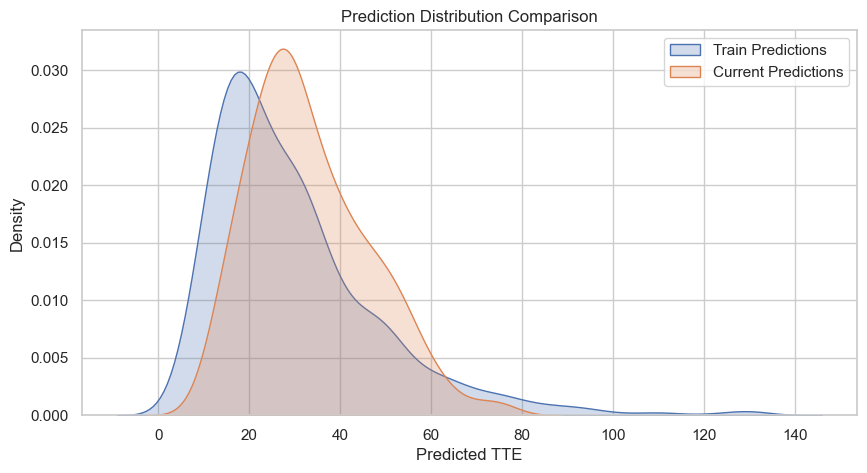

In [6]:
# 6. Compare prediction distributions
plt.figure(figsize=(10, 5))
sns.kdeplot(df_train["predicted_tte"], label="Train Predictions", fill=True)
sns.kdeplot(df_current["predicted_tte"], label="Current Predictions", fill=True)
plt.title("Prediction Distribution Comparison")
plt.xlabel("Predicted TTE")
plt.legend()
plt.show()

In [8]:
# 7. Calculate prediction drift metric (e.g., RMSE between predicted and true TTE)
# rmse_train = mean_squared_error(y_train, df_train["predicted_tte"], squared=False)
# rmse_current = mean_squared_error(y_current, df_current["predicted_tte"], squared=False)
rmse_train = mean_squared_error(y_train, df_train["predicted_tte"])
rmse_current = mean_squared_error(y_current, df_current["predicted_tte"])

print(f"RMSE on Training Set: {rmse_train:.2f}")
print(f"RMSE on Current Set: {rmse_current:.2f}")
print(f"Prediction Drift Delta: {rmse_current - rmse_train:.2f}")

RMSE on Training Set: 150.31
RMSE on Current Set: 852.01
Prediction Drift Delta: 701.70


In [10]:
df_current

,feature_1,feature_2,tte,predicted_tte
0,13.432820,25.208623,2.101269,35.822488
1,7.535334,22.917722,70.156156,26.309679
2,11.100926,19.352414,35.176065,12.607620
3,12.752768,22.899286,22.084937,23.807812
4,12.459586,16.465537,44.070362,20.324495
...,...,...,...,...
295,13.899281,15.985878,25.906335,29.976589
296,11.763853,19.630136,34.183355,32.623133
297,13.049025,19.621672,6.606454,20.148583
298,9.840293,29.862711,12.993521,56.679128


In [9]:
# 8. Optional: Monitor drift over time (e.g., current data by date)
df_current["date"] = pd.to_datetime(df_current["date"])
df_current["error"] = (df_current["tte"] - df_current["predicted_tte"])**2

drift_over_time = df_current.groupby(df_current["date"].dt.to_period("W"))["error"].mean()

drift_over_time.plot(kind="line", figsize=(10, 4), title="Prediction Drift Over Time")
plt.ylabel("Mean Squared Error")
plt.xlabel("Week")
plt.show()

KeyError: 'date'